# Data Preparation

Mount GDrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Intent Datasets

In [2]:
import pandas as pd

df_small_talk = pd.read_csv("drive/My Drive/BNGKT - Travelah CHATBOT/Intent/travelah - all_intent.csv")
df_small_talk.head(10)

,utterances,intent,responses
0,who are you?,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
1,all about you,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
2,what is your personality,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
3,define yourself,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
4,what are you,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
5,say about you,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
6,introduce yourself,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
7,describe yourself,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
8,about yourself,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."
9,tell me about you,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f..."


In [3]:
df_small_talk['intent'].value_counts()

budget_faq                                 102
how_to go_faq                              102
smalltalk_agent_tell_me_a_joke             102
safe_faq                                   101
smalltalk_user_joking                      101
smalltalk_user_tired                       101
smalltalk_agent_age                        101
smalltalk_agent_what_can_you_do            101
casino_faq                                 101
weather_faq                                101
visa_faq                                   101
drinkwater_faq                             101
preparation_faq                            101
clothing_faq                               101
foodprice_faq                              101
rentcar_faq                                101
buddhist_faq                               101
language_faq                               101
exchange_faq                               101
whattoeathalal_faq                         101
smalltalk_user_angry                       101
smalltalk_dia

Visualize Intent

<Axes: >

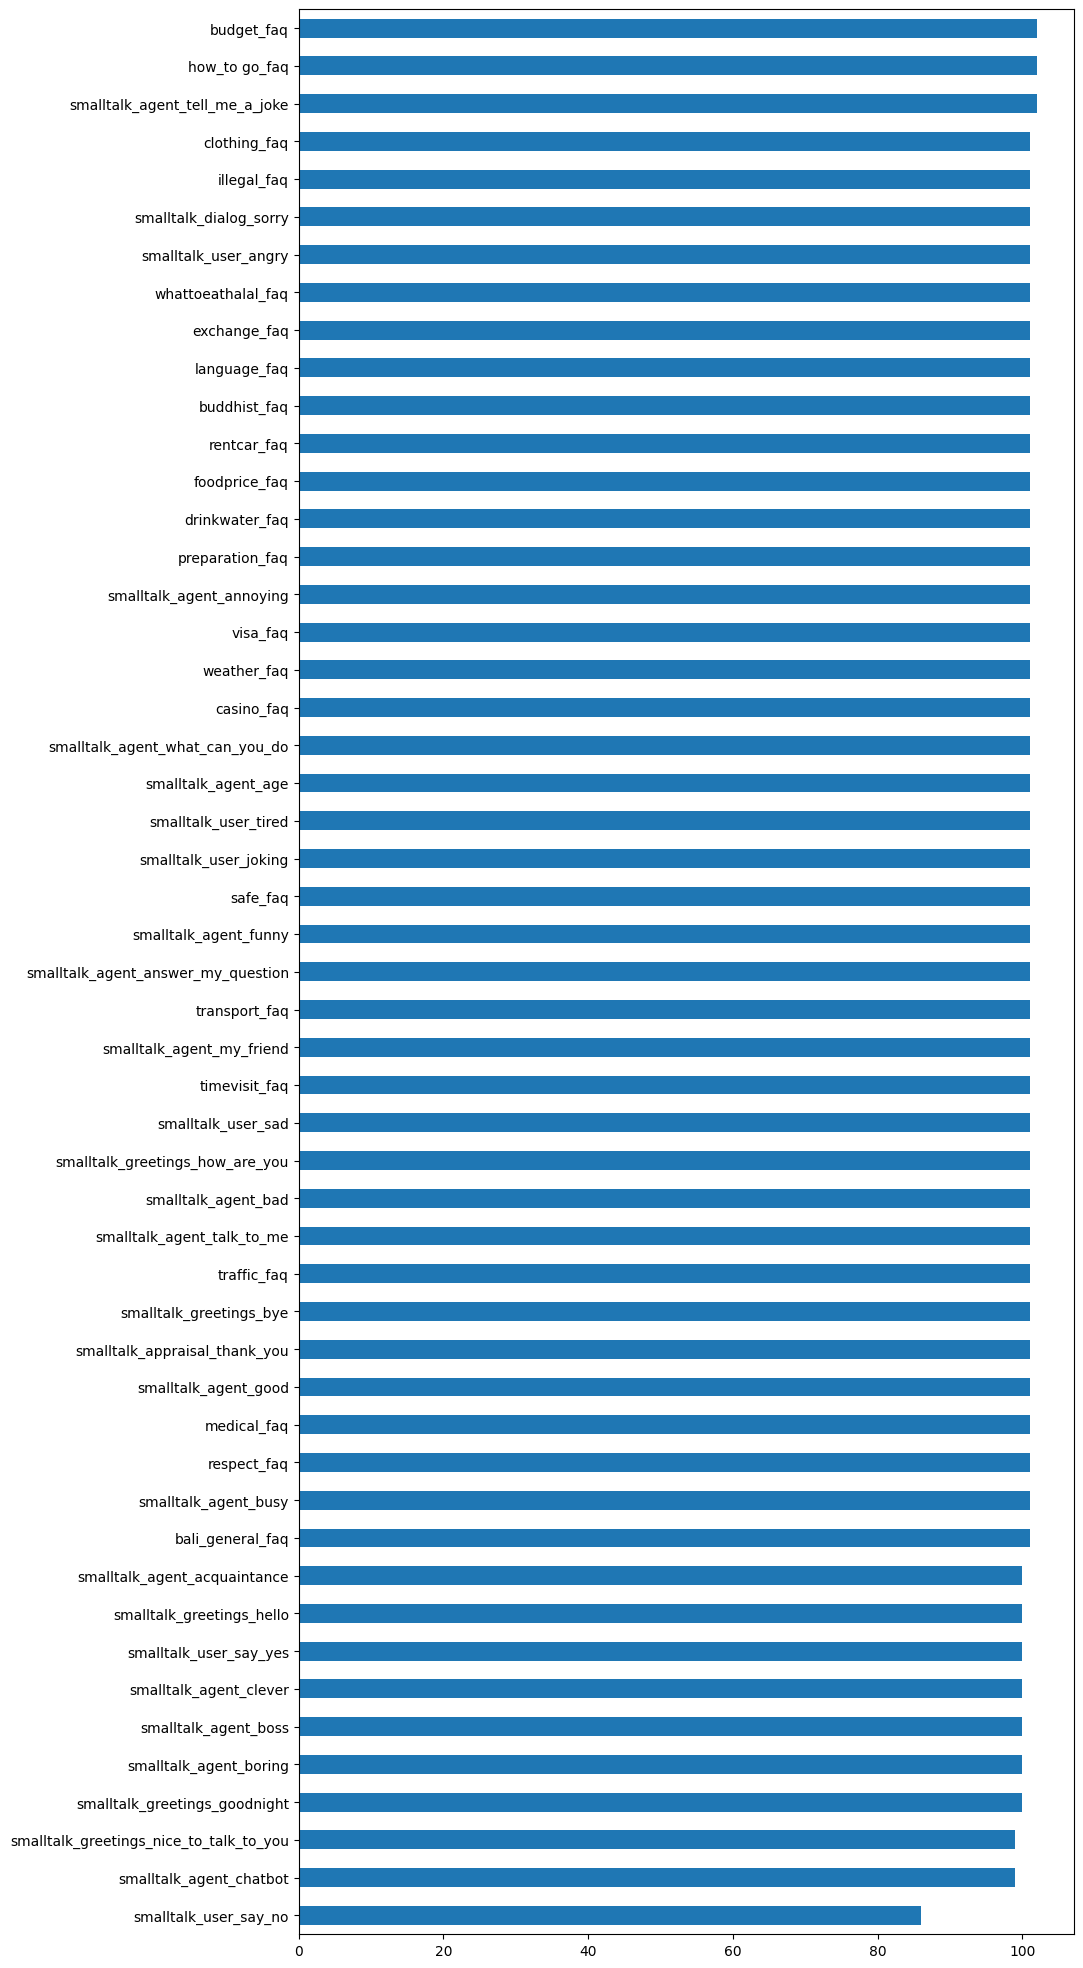

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,25))
df_small_talk['intent'].value_counts().sort_values().plot(kind = 'barh')

## Train-Val Split

Label Encoding

In [5]:
# converting type of columns to 'category'
df_small_talk['intent'] = df_small_talk['intent'].astype('category')
# Assigning numerical values and storing in another column
df_small_talk['intent_encoding'] = df_small_talk['intent'].cat.codes
df_small_talk

,utterances,intent,responses,intent_encoding
0,who are you?,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f...",16
1,all about you,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f...",16
2,what is your personality,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f...",16
3,define yourself,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f...",16
4,what are you,smalltalk_agent_acquaintance,"Hey buddy! I'm Vela, your virtual tour guide f...",16
...,...,...,...,...
5123,Can I make Bali happen without going all out o...,budget_faq,"Absolutely, buddy! Bali can totally fit your b...",2
5124,Is Bali a solid choice for those trying to sav...,budget_faq,"Absolutely, buddy! Bali can totally fit your b...",2
5125,Can I get my Bali vibe on without spending mad...,budget_faq,"Absolutely, buddy! Bali can totally fit your b...",2
5126,Is it realistic to chase Bali dreams without a...,budget_faq,"Absolutely, buddy! Bali can totally fit your b...",2


In [6]:
from sklearn.model_selection import train_test_split
# Split the dataset into X (features) and y (intent labels)
X = df_small_talk['utterances']  # Assuming 'text' column contains the input features
y = df_small_talk['intent_encoding']  # Assuming 'intent' column contains the intent labels

# Split the data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.values
X_val = X_val.values
X_test = X_test.values
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [7]:
X_train

array(["What's the deal with your incredible intelligence?",
       "What's the coolest time to embark on a surfing adventure in Bali's world-famous waves?",
       'Alright, mate! I need some guidance. How can I get around in Bali? Any tips?',
       ..., "i'm grateful",
       'Are there any specific places where I can easily exchange my currency in Bali?',
       "What's the deal with being all respectful and stuff to the locals in Bali?"],
      dtype=object)

In [8]:
len(X_train), len(X_test), len(X_val)

(3281, 821, 1026)

In [9]:
len(y_train), len(y_test), len(y_val)

(3281, 821, 1026)

In [10]:
y_train

array([25, 45, 47, ..., 32,  6, 14], dtype=int8)

# Modelling

In [ ]:
# Required to preprocess text for BERT inputs
!pip install -q tensorflow-text==2.11.*
!pip install -q tf-models-official==2.11.0
!pip install tf-models-official

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

tf.get_logger().setLevel('ERROR')

Initiate BERT model and preprocessor

In [12]:
bert_encoder_model = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_preprocessor = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

Test the preprocessor

In [13]:
bert_preprocess_model = hub.KerasLayer(bert_preprocessor)

In [14]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


Test the BERT model

In [15]:
bert_model = hub.KerasLayer(bert_encoder_model)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {bert_encoder_model}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

# Adding Classifier Layer

## Standard Dense Layer

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(bert_preprocessor, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(bert_encoder_model, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(num_classes, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()
epochs=5
optimizer=tf.keras.optimizers.Adam(1e-5)

In [ ]:
num_classes = len(df_small_talk['intent'].unique())

In [ ]:
y_train

array([ 0,  1, 16, ..., 16,  8, 18], dtype=int8)

In [ ]:
# Build the classifier model
classifier_model = build_classifier_model()
# classifier_model = build_classifier_model_double_bert()

In [ ]:
# Compile the model
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

# Convert target labels to one-hot encoding
y_train_one_hot = tf.one_hot(y_train, num_classes)
y_val_one_hot = tf.one_hot(y_val, num_classes)

In [ ]:
y_val_one_hot

<tf.Tensor: shape=(586, 29), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Train the model
history = classifier_model.fit(x=X_train, y=y_train_one_hot,
                               validation_data=(X_val, y_val_one_hot),
                               batch_size=32,
                               epochs=7)

Epoch 1/7
59/59 [==============================] - 122s 1s/step - loss: 3.1558 - categorical_accuracy: 0.1147 - val_loss: 2.5981 - val_categorical_accuracy: 0.2884
Epoch 2/7
59/59 [==============================] - 62s 1s/step - loss: 2.2563 - categorical_accuracy: 0.4771 - val_loss: 1.6612 - val_categorical_accuracy: 0.7218
Epoch 3/7
59/59 [==============================] - 62s 1s/step - loss: 1.4589 - categorical_accuracy: 0.7812 - val_loss: 1.0405 - val_categorical_accuracy: 0.8532
Epoch 4/7
59/59 [==============================] - 62s 1s/step - loss: 0.8882 - categorical_accuracy: 0.9002 - val_loss: 0.6660 - val_categorical_accuracy: 0.9044
Epoch 5/7
59/59 [==============================] - 58s 980ms/step - loss: 0.5455 - categorical_accuracy: 0.9605 - val_loss: 0.4437 - val_categorical_accuracy: 0.9300
Epoch 6/7
59/59 [==============================] - 62s 1s/step - loss: 0.3480 - categorical_accuracy: 0.9755 - val_loss: 0.3324 - val_categorical_accuracy: 0.9369
Epoch 7/7
59/59 [=

Evaluate

In [ ]:
y_test_one_hot = tf.one_hot(y_test, num_classes)

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test,y_test_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

15/15 [==============================] - 5s 322ms/step - loss: 0.2596 - categorical_accuracy: 0.9467
Loss: 0.25964465737342834
Accuracy: 0.94669508934021


Visualize

In [ ]:
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')
import seaborn as sns
from pylab import rcParams

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
import warnings
warnings.filterwarnings("ignore")

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


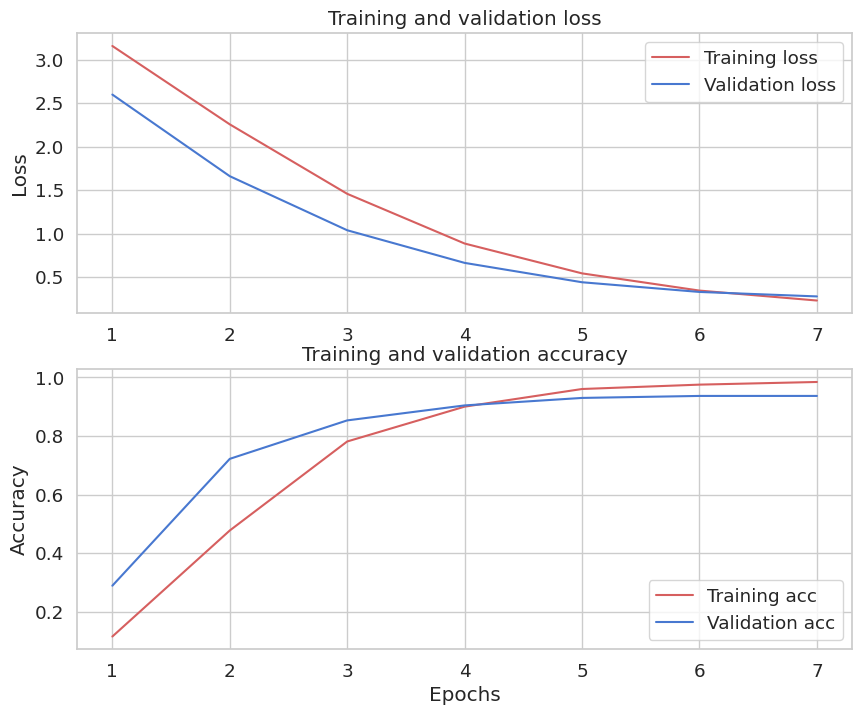

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 8))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(True)
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Let's Talk to VELA

In [ ]:
intent_mapping = df_small_talk.groupby('intent_encoding')['intent'].first().to_dict()

In [ ]:
intent_mapping

{0: 'smalltalk_agent_acquaintance',
 1: 'smalltalk_agent_age',
 2: 'smalltalk_agent_annoying',
 3: 'smalltalk_agent_answer_my_question',
 4: 'smalltalk_agent_bad',
 5: 'smalltalk_agent_boring',
 6: 'smalltalk_agent_boss',
 7: 'smalltalk_agent_busy',
 8: 'smalltalk_agent_chatbot',
 9: 'smalltalk_agent_clever',
 10: 'smalltalk_agent_funny',
 11: 'smalltalk_agent_good',
 12: 'smalltalk_agent_my_friend',
 13: 'smalltalk_agent_talk_to_me',
 14: 'smalltalk_agent_tell_me_a_joke',
 15: 'smalltalk_agent_what_can_you_do',
 16: 'smalltalk_appraisal_thank_you',
 17: 'smalltalk_dialog_sorry',
 18: 'smalltalk_greetings_bye',
 19: 'smalltalk_greetings_goodnight',
 20: 'smalltalk_greetings_hello',
 21: 'smalltalk_greetings_how_are_you',
 22: 'smalltalk_greetings_nice_to_talk_to_you',
 23: 'smalltalk_user_angry',
 24: 'smalltalk_user_joking',
 25: 'smalltalk_user_sad',
 26: 'smalltalk_user_say_no',
 27: 'smalltalk_user_say_yes',
 28: 'smalltalk_user_tired'}

Test chat

In [ ]:
import numpy as np

user_utterance = "hello man"
user_utterance = np.array([user_utterance])

# Make the prediction
predictions = classifier_model.predict(user_utterance)
predicted_intent_index = np.argmax(predictions)

# Map the predicted intent index to intent label and response
predicted_intent_label = intent_mapping[predicted_intent_index]
predicted_response = df_small_talk.loc[df_small_talk['intent'] == predicted_intent_label, 'responses'].iloc[0]

print("Predicted Intent:", predicted_intent_label)
print("VELA:", predicted_response)

1/1 [==============================] - 0s 78ms/step
Predicted Intent: smalltalk_greetings_hello
VELA: Hi there! Ready to explore Indonesia together? I'm here and excited to be your virtual tour guide.


Chat simulation

In [ ]:
import numpy as np
import ipywidgets as widgets

# Create a text box for user input
text_box = widgets.Textarea(value='', placeholder='Enter what do you want to ask me', rows=3)

# Display the text box
display(text_box)

# Create a button for submitting the input
button = widgets.Button(description='Submit')

# Function to handle button click event
def on_button_clicked(b):
    user_input = np.array([text_box.value])  # Get the user input from the text box
    
    # Make the prediction
    predictions = classifier_model.predict(user_input)
    predicted_intent_index = np.argmax(predictions)

    # Map the predicted intent index to intent label and response
    predicted_intent_label = intent_mapping[predicted_intent_index]
    predicted_response = df_small_talk.loc[df_small_talk['intent'] == predicted_intent_label, 'responses'].iloc[0]

    print("Predicted Intent:", predicted_intent_label)
    print("VELA:", predicted_response)

# Register the button click event handler
button.on_click(on_button_clicked)

# Display the button
display(button)

Textarea(value='', placeholder='Enter what do you want to ask me', rows=3)

Button(description='Submit', style=ButtonStyle())

1/1 [==============================] - 0s 47ms/step
Predicted Intent: smalltalk_greetings_hello
VELA: Hi there! Ready to explore Indonesia together? I'm here and excited to be your virtual tour guide.
1/1 [==============================] - 0s 47ms/step
Predicted Intent: smalltalk_agent_what_can_you_do
VELA: Hey, buddy! I'm your go-to gal when it comes to exploring Indonesia. I can provide you with all the juicy deets on the most breathtaking destinations, recommend must-visit spots, and help you plan your dream virtual tour. Whether you need information about local culture, cuisine, or hidden gems, I've got you covered! Just let me know what you're looking for, and I'll sprinkle my virtual tour guide magic to make it happen.
1/1 [==============================] - 0s 49ms/step
Predicted Intent: smalltalk_greetings_hello
VELA: Hi there! Ready to explore Indonesia together? I'm here and excited to be your virtual tour guide.
1/1 [==============================] - 0s 28ms/step
Predicted In

# CNN Model

In [17]:
def build_CNN_classifier_model():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
    preprocessing_layer = hub.KerasLayer(bert_preprocessor, name='preprocessing')
    encoder_inputs = preprocessing_layer(text_input)
    encoder = hub.KerasLayer(bert_encoder_model, trainable=True, name='BERT_encoder')
    outputs = encoder(encoder_inputs)
    net = sequence_output = outputs["sequence_output"]

    net = tf.keras.layers.Conv1D(32, 2, activation='relu')(net)
    net = tf.keras.layers.Conv1D(64, 2, activation='relu')(net)
    net = tf.keras.layers.MaxPooling1D(pool_size=2)(net)
    
    net = tf.keras.layers.GlobalMaxPool1D()(net)
    
    net = tf.keras.layers.Dense(512, activation="relu")(net)
    net = tf.keras.layers.Dropout(0.1)(net)
    
    net = tf.keras.layers.Dense(num_classes, activation="softmax", name='classifier')(net)
    
    return tf.keras.Model(text_input, net)

In [19]:
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()
epochs = 7
optimizer=tf.keras.optimizers.Adam(1e-5)

In [20]:
num_classes = len(df_small_talk['intent'].unique())

In [21]:
classifier_model_cnn = build_CNN_classifier_model()

In [22]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

In [23]:
# Compile the model
classifier_model_cnn.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

# Convert target labels to one-hot encoding
y_train_one_hot = tf.one_hot(y_train, num_classes)
y_val_one_hot = tf.one_hot(y_val, num_classes)

In [24]:
# Train the model
history = classifier_model_cnn.fit(x=X_train, y=y_train_one_hot,
                               validation_data=(X_val, y_val_one_hot),
                               batch_size=32,
                               epochs=epochs)

Epoch 1/7
103/103 [==============================] - 163s 1s/step - loss: 3.9079 - categorical_accuracy: 0.0366 - val_loss: 3.8027 - val_categorical_accuracy: 0.0780
Epoch 2/7
103/103 [==============================] - 105s 1s/step - loss: 3.6413 - categorical_accuracy: 0.1134 - val_loss: 3.3419 - val_categorical_accuracy: 0.1969
Epoch 3/7
103/103 [==============================] - 114s 1s/step - loss: 3.0515 - categorical_accuracy: 0.2902 - val_loss: 2.5654 - val_categorical_accuracy: 0.5136
Epoch 4/7
103/103 [==============================] - 114s 1s/step - loss: 2.2273 - categorical_accuracy: 0.5986 - val_loss: 1.6952 - val_categorical_accuracy: 0.7827
Epoch 5/7
103/103 [==============================] - 114s 1s/step - loss: 1.4737 - categorical_accuracy: 0.8183 - val_loss: 1.0377 - val_categorical_accuracy: 0.8850
Epoch 6/7
103/103 [==============================] - 105s 1s/step - loss: 0.9351 - categorical_accuracy: 0.9153 - val_loss: 0.6232 - val_categorical_accuracy: 0.9454
Epoc

In [25]:
y_test_one_hot = tf.one_hot(y_test, num_classes)

In [26]:
loss, accuracy = classifier_model_cnn.evaluate(X_test,y_test_one_hot)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

26/26 [==============================] - 9s 331ms/step - loss: 0.3996 - categorical_accuracy: 0.9501
Loss: 0.39957839250564575
Accuracy: 0.9500609040260315


### Save Model

In [38]:
# Save the model
model_filename = "classifier_model_cnn.h5"
path = f"drive/My Drive/BNGKT - Travelah CHATBOT/Model/{model_filename}" 
classifier_model_cnn.save(model_filename)
print("Model saved as", model_filename)

Model saved as classifier_model_cnn.h5


Testing the saved model

In [48]:
from tensorflow.keras.models import load_model

# Load the saved model
model_filename = "classifier_model_cnn.h5"
loaded_model = load_model(model_filename, custom_objects={'KerasLayer': hub.KerasLayer})
print("Model loaded from", model_filename)

# Use the loaded model for prediction
predictions = loaded_model.predict(X_test)

Model loaded from classifier_model_cnn.h5
26/26 [==============================] - 10s 370ms/step


In [28]:
intent_mapping = df_small_talk.groupby('intent_encoding')['intent'].first().to_dict()

In [54]:
import numpy as np

user_utterance = "you good?"
user_utterance = np.array([user_utterance])

# Make the prediction
predictions = loaded_model.predict(user_utterance)
predicted_intent_index = np.argmax(predictions)

# Map the predicted intent index to intent label and response
predicted_intent_label = intent_mapping[predicted_intent_index]
predicted_response = df_small_talk.loc[df_small_talk['intent'] == predicted_intent_label, 'responses'].iloc[0]

print("Predicted Intent:", predicted_intent_label)
print("VELA:", predicted_response)

1/1 [==============================] - 0s 78ms/step
Predicted Intent: smalltalk_greetings_how_are_you
VELA: Hey, thanks for asking! I'm doing great and feeling super excited to be your virtual tour guide for exploring Indonesia. My day is going fantastic, and I'm here, ready to make your virtual tour experience amazing. 
